# EDA for Picture Dataset

Initial look at data and data cleaning


## Import necassary libraries


In [1]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Pictures CSV file

In [2]:
import os
ROOT = os.environ.get('PWD')

In [3]:
#Load dataset
df_pictures = pd.read_csv('../data/listing_pictures_0210707.csv')


In [4]:
df_pictures.head()

,listing_id,added,activated,height,width,format,description,start_pic_summer,start_pic_winter
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,2009-12-03 00:00:00,2010-12-16 00:00:00,757,1000,PNG,Furnishing,0,0
1,4e012316-0f53-5fc6-a17f-580ff832554e,2010-01-05 00:00:00,2010-12-16 00:00:00,248,300,PNG,Floor plan,0,0
2,9e49f41a-05ca-53ff-ac92-f625f8a0f05b,2009-10-28 00:00:00,2010-12-16 00:00:00,830,1000,PNG,Outdoor shots,0,0
3,60b8dc3e-5745-5ff5-b99a-eb460f7c14f1,2009-12-03 00:00:00,2010-12-16 00:00:00,797,1000,PNG,Outdoor shots,1,1
4,754aeffd-789d-5135-9491-032e28b72f23,2009-07-17 00:00:00,2010-12-16 00:00:00,1000,832,PNG,Floor plan,0,0


## Correcting date and time formatting.

In [5]:
#set date/time
df_pictures['added'] = pd.to_datetime(df_pictures['added'])
df_pictures['activated'] = pd.to_datetime(df_pictures['activated'])

In [6]:
df_pictures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644821 entries, 0 to 644820
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   listing_id        644821 non-null  object        
 1   added             644821 non-null  datetime64[ns]
 2   activated         644821 non-null  datetime64[ns]
 3   height            644821 non-null  int64         
 4   width             644821 non-null  int64         
 5   format            644821 non-null  object        
 6   description       644821 non-null  object        
 7   start_pic_summer  644821 non-null  int64         
 8   start_pic_winter  644821 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 44.3+ MB


In [7]:
df_pictures.describe().round()

,height,width,start_pic_summer,start_pic_winter
count,644821.0,644821.0,644821.0,644821.0
mean,2248.0,2976.0,0.0,0.0
std,1114.0,1504.0,0.0,0.0
min,1.0,1.0,0.0,0.0
25%,1228.0,1600.0,0.0,0.0
50%,2304.0,3024.0,0.0,0.0
75%,3024.0,4032.0,0.0,0.0
max,19005.0,25340.0,1.0,1.0


In [8]:
df_pictures.isna().sum()

listing_id          0
added               0
activated           0
height              0
width               0
format              0
description         0
start_pic_summer    0
start_pic_winter    0
dtype: int64

In [9]:
df_pictures.nunique()

listing_id           30222
added               566475
activated           560004
height                5813
width                 7405
format                   7
description              7
start_pic_summer         2
start_pic_winter         2
dtype: int64

In [10]:
df_pictures.format.unique()

array(['PNG', 'JPEG', 'BMP', 'GIF', 'TIFF', 'BMP3', 'PBM'], dtype=object)

## Format of picture is unlikely to be a predictor of people chosing to rent.

Removed format column because it is not functional for this EDA

In [11]:
del df_pictures['format']

In [12]:
df_pictures.head()

,listing_id,added,activated,height,width,description,start_pic_summer,start_pic_winter
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,2009-12-03,2010-12-16,757,1000,Furnishing,0,0
1,4e012316-0f53-5fc6-a17f-580ff832554e,2010-01-05,2010-12-16,248,300,Floor plan,0,0
2,9e49f41a-05ca-53ff-ac92-f625f8a0f05b,2009-10-28,2010-12-16,830,1000,Outdoor shots,0,0
3,60b8dc3e-5745-5ff5-b99a-eb460f7c14f1,2009-12-03,2010-12-16,797,1000,Outdoor shots,1,1
4,754aeffd-789d-5135-9491-032e28b72f23,2009-07-17,2010-12-16,1000,832,Floor plan,0,0


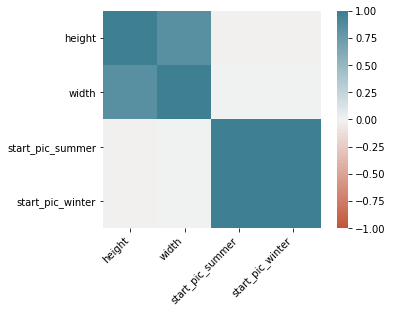

In [13]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_pictures.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
corr.style.background_gradient(cmap='coolwarm')

,height,width,start_pic_summer,start_pic_winter
height,1.000000,0.850485,-0.021903,-0.021913
width,0.850485,1.000000,0.002402,0.002390
start_pic_summer,-0.021903,0.002402,1.000000,0.999895
start_pic_winter,-0.021913,0.002390,0.999895,1.000000


In [15]:
df_pictures.description.unique()

array(['Furnishing', 'Floor plan', 'Outdoor shots',
       'Surroundings / Leisure', 'Owner', 'Other', 'Certificates & Logos'],
      dtype=object)

In [16]:
df_pictures.description.value_counts()

Furnishing                287994
Outdoor shots             161504
Surroundings / Leisure    150207
Floor plan                 16919
Certificates & Logos       14052
Owner                      13309
Other                        836
Name: description, dtype: int64

## Creating column defining picture quality

Dropping height and width

In [ ]:
df_pictures['']